In [ ]:
pip install mysql-connector-python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import os

In [199]:
data = pd.read_csv('orders.csv',na_values=(['Not Available', 'unknown']))
data.head(5)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [201]:
# data.info()
print(data)

      Order Id  Order Date       Ship Mode    Segment        Country  \
0            1  2023-03-01    Second Class   Consumer  United States   
1            2  2023-08-15    Second Class   Consumer  United States   
2            3  2023-01-10    Second Class  Corporate  United States   
3            4  2022-06-18  Standard Class   Consumer  United States   
4            5  2022-07-13  Standard Class   Consumer  United States   
...        ...         ...             ...        ...            ...   
9989      9990  2023-02-18    Second Class   Consumer  United States   
9990      9991  2023-03-17  Standard Class   Consumer  United States   
9991      9992  2022-08-07  Standard Class   Consumer  United States   
9992      9993  2022-11-19  Standard Class   Consumer  United States   
9993      9994  2022-07-17    Second Class   Consumer  United States   

                 City       State  Postal Code Region         Category  \
0           Henderson    Kentucky        42420  South        

In [203]:
# data.rename(columns={'Order Id':'order_id'})
data.columns = data.columns.str.lower()

In [205]:
data.columns = data.columns.str.replace(' ','_')

In [207]:
data['order_date'].unique()

array(['2023-03-01', '2023-08-15', '2023-01-10', '2022-06-18',
       '2022-07-13', '2022-03-13', '2022-12-28', '2022-01-25',
       '2023-03-23', '2023-05-16', '2023-03-31', '2023-12-25',
       '2022-02-11', '2023-07-18', '2023-11-09', '2022-02-04',
       '2023-08-04', '2022-01-23', '2022-01-11', '2022-10-05',
       '2023-07-16', '2023-05-06', '2023-05-21', '2023-02-24',
       '2022-06-20', '2022-02-08', '2023-12-11', '2022-08-21',
       '2022-08-14', '2022-11-20', '2023-01-19', '2023-01-30',
       '2022-06-03', '2022-09-28', '2022-10-30', '2023-07-27',
       '2023-03-07', '2023-08-18', '2022-01-20', '2023-06-29',
       '2022-06-28', '2023-02-09', '2023-09-18', '2022-11-11',
       '2022-05-27', '2023-02-03', '2022-02-16', '2022-05-06',
       '2023-06-18', '2023-09-09', '2022-01-31', '2023-07-30',
       '2023-10-17', '2023-07-06', '2023-09-15', '2022-08-09',
       '2022-04-05', '2023-06-24', '2022-03-10', '2023-04-08',
       '2023-10-16', '2023-08-02', '2022-11-05', '2022-

In [209]:
data['order_date']=pd.to_datetime(data['order_date'])

In [211]:
# data.isnull().sum()
# data['ship_mode'].unique()
data['ship_mode'].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

#  find discount,sale_price,profit

In [219]:
# Discount% = (Discount/Listed Price) × 100.
data['discount']=(data['list_price']*data['discount_percent'])*.01
data['sale_price']=(data['list_price']-data['discount'])
data['profit']=(data['sale_price']-data['cost_price'])

In [223]:
data.drop(columns=['cost_price', 'list_price','discount_percent'],inplace=True)

In [225]:
data.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0


In [ ]:
data.to_csv('D:\SQL Projects\Retails_orders Analysis\Orders.csv', index=False,encoding='utf-8')

#  import the data into mysql server

In [237]:
# List of CSV files and their corresponding table names
csv_files = [
    ('orders.csv', 'orders')
    # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='uzair@110ali7212',
    database='retails'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'D:\SQL Projects\Retails_orders Analysis'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing orders.csv
NaN values before replacement:
order_id        0
order_date      0
ship_mode       6
segment         0
country         0
city            0
state           0
postal_code     0
region          0
category        0
sub_category    0
product_id      0
quantity        0
discount        0
sale_price      0
profit          0
dtype: int64



In [3]:
db = mysql.connector.connect(
     host='localhost',
    user='root',
    password='uzair@110ali7212',
    database='retails'
)
cur = db.cursor()

# find top 10 highest reveue generating products

In [81]:
query = """
with highest_revenue as 
(select 
product_id,round(sum(sale_price),2) as revenue
from orders
group by product_id)
select *, row_number() over(order by revenue)
from highest_revenue
order by revenue desc
"""
cur.execute(query)
data = cur.fetchall()
data = pd.DataFrame(data,columns = ["product_id","Total_revenue",'rank'])
data.head(10)

,product_id,Total_revenue,rank
0,TEC-CO-10004722,59514.0,1862
1,OFF-BI-10003527,26525.3,1861
2,TEC-MA-10002412,21734.4,1860
3,FUR-CH-10002024,21096.2,1859
4,OFF-BI-10001359,19090.2,1858
5,OFF-BI-10000545,18249.0,1857
6,TEC-CO-10001449,18151.2,1856
7,TEC-MA-10001127,17906.4,1855
8,OFF-BI-10004995,17354.8,1854
9,OFF-SU-10000151,16325.8,1853


 #  find top 5 highest selling products in each regions

In [71]:
query = """
with cte as (select 
region,product_id,sum(sale_price) as revenue
from orders
group by region,product_id)
select * from (
select *
, row_number() over(partition by region order by revenue desc) as _rank
from cte) t
where _rank<=5
"""
cur.execute(query)
data = cur.fetchall()
data = pd.DataFrame(data,columns = ["region","product_id",'revenue','rank'])
data

,region,product_id,revenue,rank
0,Central,TEC-CO-10004722,16975.000000,1
1,Central,TEC-MA-10000822,13770.000000,2
2,Central,OFF-BI-10001120,11056.500000,3
3,Central,OFF-BI-10000545,10132.700012,4
4,Central,OFF-BI-10004995,8416.099854,5
5,East,TEC-CO-10004722,29099.000000,1
6,East,TEC-MA-10001047,13767.000000,2
7,East,FUR-BO-10004834,11274.100098,3
8,East,OFF-BI-10001359,8463.600220,4
9,East,TEC-CO-10001449,8316.000000,5


#  which sub category had highest growth by profit in 2023 campare to 2022

<Axes: >

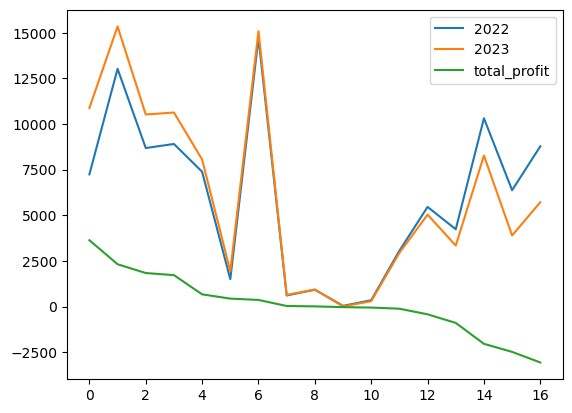

In [67]:
query = """
with cte as (select 
year(order_date) as _year,sub_category,round(sum(profit),2) as sales_profit
from orders 
group by _year,sub_category)
, cte2 as(
select sub_category,
sum(case when _year = 2022 then sales_profit else 0 end) as profit_2022, -- due to overall sale sum in 1 months
sum(case when _year = 2023 then sales_profit else 0 end) as profit_2023
from cte
group by sub_category)
select *,
(profit_2023-profit_2022) as total_profit
from cte2
order by total_profit desc;
"""
cur.execute(query)
data = cur.fetchall()
data = pd.DataFrame(data,columns = ["sub-category","2022",'2023','total_profit'])
data.plot(kind = 'line')

#  For each category which month had highest sales

In [45]:
query = """
with cte as (select 
month(order_date) as _month,category, round(sum(sale_price),2) as revenue
from orders
group by _month,category)
select * from (
select *
, row_number() over(partition by category order by revenue desc) as _rank
from cte) t
where _rank<=1;
"""
cur.execute(query)
data = cur.fetchall()
data = pd.DataFrame(data,columns = ["Month","sub-category",'revenue','rank'])
data

,Month,sub-category,revenue,rank
0,8,Furniture,71649.5,1
1,2,Office Supplies,77959.5,1
2,10,Technology,103021.1,1


#  region bases 

In [31]:
query = """
with cte as (select 
month(order_date) as _month,category,region,round(sum(sale_price),2) as revenue
from orders
group by _month,category,region)
select * from (
select *
, row_number() over(partition by category,region order by revenue desc) as _rank
from cte) t
where _rank<=1;
"""
cur.execute(query)
data = cur.fetchall()
data = pd.DataFrame(data,columns = ["Month","sub-category",'region','revenue','rank'])
data

,Month,sub-category,region,revenue,rank
0,7,Furniture,Central,19583.0,1
1,2,Furniture,East,30396.6,1
2,3,Furniture,South,13625.9,1
3,10,Furniture,West,26231.0,1
4,2,Office Supplies,Central,27072.7,1
5,10,Office Supplies,East,24325.2,1
6,12,Office Supplies,South,16969.4,1
7,4,Office Supplies,West,29959.3,1
8,8,Technology,Central,27219.4,1
9,6,Technology,East,30695.9,1


#  find months over months growths comparsion for 2022 and 2023 sales

<Axes: >

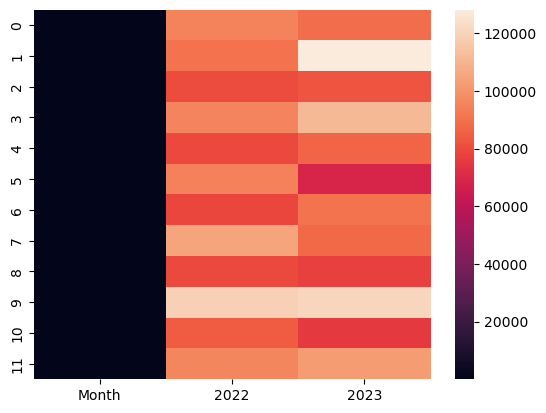

In [53]:
query = """
with cte as (select 
month(order_date) as _month,year(order_date) as _year, round(sum(sale_price),2) as sales
from orders 
group by _year,_month)
select _month,
sum(case when _year = 2022 then sales else 0 end) as sale_2022, -- due to overall sale sum in 1 months
sum(case when _year = 2023 then sales else 0 end) as sale_2023
from cte
group by _month
order by _month;
"""
cur.execute(query)
data = cur.fetchall()
data = pd.DataFrame(data,columns = ["Month",'2022','2023'])
sns.heatmap(data)